<a href="https://colab.research.google.com/github/21PA1A6132/3-2_DL_LAB/blob/main/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

#Load the dataset

In [5]:
data = pd.read_csv("/content/car_purchasing.csv",encoding='ISO-8859-1')

In [6]:
data.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


#Printing information about dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   JobTitle             500 non-null    object 
 2   customer e-mail      500 non-null    object 
 3   country              500 non-null    object 
 4   gender               500 non-null    int64  
 5   age                  500 non-null    int64  
 6   BasePay              500 non-null    float64
 7   OvertimePay          500 non-null    float64
 8   OtherPay             500 non-null    float64
 9   Benefits             0 non-null      float64
 10  TotalPay             500 non-null    float64
 11  TotalPayBenefits     500 non-null    float64
 12  credit card debt     500 non-null    float64
 13  net worth            500 non-null    float64
 14  car purchase amount  500 non-null    float64
dtypes: float64(9), int64(2), object(4)
memor

#calculating the relationship between each column

In [10]:
data.corr()[['car purchase amount']].sort_values(['car purchase amount'])

,car purchase amount
gender,-0.066408
OvertimePay,-0.031566
OtherPay,-0.008536
TotalPay,0.006014
TotalPayBenefits,0.006014
credit card debt,0.028882
BasePay,0.037602
net worth,0.488580
age,0.633273
car purchase amount,1.000000


#Dropping irrelevant columns

In [12]:
car_df = data.drop(['customer name','customer e-mail','JobTitle','country','Benefits'],axis=1)

#Selecting input characteristics and output fields

In [15]:
Y=car_df['car purchase amount']
X = car_df.drop(['car purchase amount'],axis=1)
print(X.shape,Y.shape)

(500, 9) (500,)


#Preprocessing the data

In [19]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

Y = mms.fit_transform(Y.values.reshape(-1,1))


#Split data into train and testing data

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state =42)

#ANN MODEL

In [23]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25,input_dim =9,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 926 (3.62 KB)
Trainable params: 926 (3.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
epochs_hist = model.fit(x_train,y_train,epochs=10,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 63ms/step - loss: 0.8507 - val_loss: 0.7065
Epoch 2/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6280 - val_loss: 0.5074
Epoch 3/10
6/6 [==============================] - 0s 10ms/step - loss: 0.4554 - val_loss: 0.3465
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3145 - val_loss: 0.2239
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 0.2044 - val_loss: 0.1328
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 0.1228 - val_loss: 0.0701
Epoch 7/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0691 - val_loss: 0.0365
Epoch 8/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0415 - val_loss: 0.0281
Epoch 9/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0335 - val_loss: 0.0319
Epoch 10/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0344 - val_loss: 0.0321


In [26]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

#Visualization

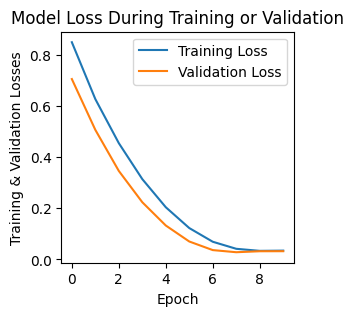

In [27]:
plt.figure(figsize=(3,3),dpi=100)
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
